# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats
import math

df = pd.read_csv(r"C:\Users\yi6\Desktop\human_temp\data\human_body_temperature.csv")


In [8]:
df_male = df[df.gender== "M"]
df_female = df[df.gender == "F"]
df_pivot = pd.pivot_table(data = df, index = "gender")




## 1.Test for Normality

The null hypothesis is that the distributions are normal. The test is will be evaluated at the 95% confidence interval. If P < 2.5 or greater than 97.5. As shown below, the null hypothesis cannot be rejected

## 2. Sample size

The sample size is >30, which, as a heuristic, is considered large enough to perform a Z-test. It is unkown if the sample is random. Could it be that there is a non-random distribution of ages, family relations, or geographic area? These would certainly bias the sample





In [10]:
hr_norm = scipy.stats.mstats.normaltest(df["heart_rate"], axis=0)
temp_norm = scipy.stats.mstats.normaltest(df["temperature"], axis=0)
print(hr_norm)
print(temp_norm)



NormaltestResult(statistic=2.3488941072144787, pvalue=0.30898978724821446)
NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


## 3. One Sample, Two Tailed Hypothesis Test for Equal Means:
Ho: population mean = 98.6 degrees
H1: mean != 98.6 

In words: The null hypothesis is that the mean of the sample is taken from the same population. This will be tested at the 95% confidence interval.

I am using a two tailed test because there isn't a good reason to believe that the mean difference occurs in only one direction. Also, the bar for rejecting Ho is more stringent.

It is more appropriate to use a t-test in this instance because the population standard deviation is unknown. However, both tests will be tried, substituting hypothesized population standard deviation for sample in both tests.

To reject the null hypothesis, the z value needs to be greater than 1.96 or less than -1.96

The student T test will be tested at th 95% confidence interval using the stats.t library P value

This will be tested by comparing p value of tested values against the assumed population value using a student T and Z test

In [54]:
# t test
temp_t = stats.ttest_1samp(a = df["temperature"], popmean = 98.6)
print(temp_t)

# Z test
sample_std = np.std(df.temperature)
sample_size = df['temperature'].count()
sample_mean = np.mean(df.temperature)
sem = sample_std/ np.sqrt(sample_size)
zscore = (sample_mean - 98.6) / sem
print(sem)
print(sample_size)
print(sample_std)
print(sample_mean)
print(zscore)




Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
0.0640566146952
130
0.7303577789050377
98.24923076923078
-5.47592520208


## 3 Continued:  Summary of comparison

Both statistics indicate that the null hypothesis can be rejected: the sample mean is from a different population than the hypothesiszed population mean

The z statistics is overly confident, given that it assumes a tighter (more normal) distribution than the student t. It is not an appropriate test, given that the sample std is unknown.

In [36]:
random = df.reindex(np.random.permutation(df.index))
random_10 = random["temperature"].iloc[0:10]

print(random_10)

81      98.0
59      97.6
8       98.4
127     98.2
10      98.8
116    100.8
50      98.9
122     99.0
64      98.7
34      99.3
Name: temperature, dtype: float64


## 4. Small Sample Size
As shown below, when repeated on a random sample size of ten of our sample, the p value lowers dramatically. In this case, the t test is less confident, again because it it is "penalized" via the degrees of freedom, which seves to make the sampling distribution for the hypothesized mean leass normal. In both cases below, the null hypothesis cannot be rejected.

In [46]:
# t test
temp_t = stats.ttest_1samp(a = random_10, popmean = 98.6)
print(temp_t)

# Z test
sample_std1 = np.std(random_10)
sample_size1 = random_10.count()
sample_mean1 = np.mean(random_10)
sem1 = sample_std1/ np.sqrt(sample_size1)
zscore1 = (sample_mean1 - 98.6) / sem1
print(sem1)
print(sample_size1)
print(sample_std)
print(sample_mean1)
print(zscore1)

Ttest_1sampResult(statistic=0.61392336514884582, pvalue=0.55446453277355334)
0.262697544716
10
0.7303577789050377
98.77
0.647132047555


## 5. Margin of Error and Confidence Interval

Based on the sample statistic, 95% of temperatures should be between 98.12 and 98.38

In [55]:
margin_error = 1.96*sem
print(margin_error)

confidence_u = sample_mean +(1.96*sem)
confidence_l = sample_mean -(1.96*sem)
print(confidence_u)
print(confidence_l)




0.125550964803
98.374781734
98.1236798044
98.24923076923078
98.1236798044


## Permutation means test

In [56]:
#Permutation (null hypothesis: distributions are same)
def draw_perm_reps(df, column, df1, func, size = 1 ):
    perm_reps = np.empty(size)
    for i in range(size):
        x,y = permutation_sample(df,column,df1)
        perm_reps[i] = func(x,y)
    return perm_reps

def permutation_sample(df, column, df1):
    permuted_data = np.random.permutation(df[column])
    perm_sample_1 = permuted_data[:len(df1)]
    perm_sample_2 = permuted_data[len(df1):]
    return perm_sample_1, perm_sample_2

def mean_diff(data1, data2):
    difference = np.mean(data1) - np.mean(data2)
    return difference

-0.289230769230727
0.015


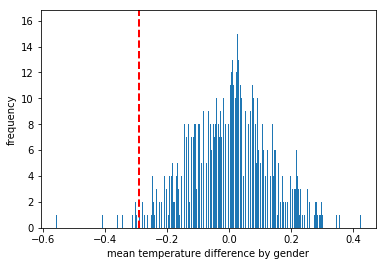

In [57]:
exp_dif = mean_diff(df_male["temperature"], df_female["temperature"])
perm_dif = draw_perm_reps(df, "temperature",df_male, mean_diff, size = 1000)
pval = np.sum(perm_dif <= exp_dif)/len(perm_dif)
print(exp_dif)
print(pval)
_ = plt.hist(perm_dif, bins = 500)
_ = plt.xlabel("mean temperature difference by gender")
_ = plt.ylabel("frequency")
_ = plt.axvline(exp_dif, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.show()


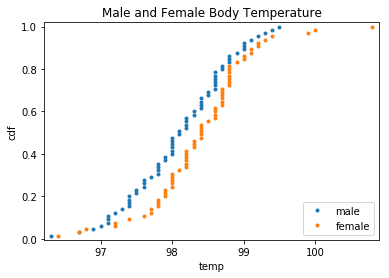

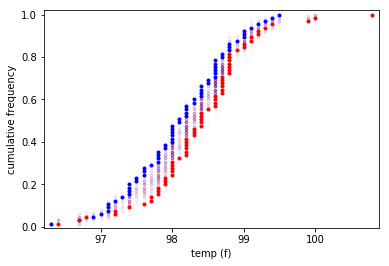

In [61]:

#for dataframes 
def cfdplotter (data, col):
    n = len(data[col])
    x = sorted(data[col])
    y = np.arange(1, n+1)/n
    return x,y

#for numpy arrays
def cfdplotter2 (data):
    n = len(data)
    x = sorted(data)
    y = np.arange(1, n+1)/n
    return x,y


m_x_t, m_y_t = cfdplotter(data = df_male, col = "temperature")
f_x_t, f_y_t = cfdplotter(data = df_female, col = "temperature")
m_x_h, m_y_h = cfdplotter(data = df_male, col = "heart_rate")
f_x_h, f_y_h = cfdplotter(data = df_female, col = "heart_rate")

#Cumulative frequency plots
_ = plt.plot(m_x_t, m_y_t, linestyle = 'none', marker = '.')
_ = plt.plot(f_x_t, f_y_t, linestyle = 'none', marker = '.')
_ = plt.xlabel("temp")
_ = plt.ylabel("cdf")
_ = plt.margins(.02)
_ = plt.legend(("male","female"), loc ="lower right")
_ = plt.title("Male and Female Body Temperature")
plt.show()



# permutation cdf plotter
for i in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(df, "temperature", df_male)
    x1,y1 = cfdplotter2(perm_sample_1)
    x2,y2 = cfdplotter2(perm_sample_2)
    _ = plt.plot(x1, y1, marker='.', linestyle='none',color='blue', alpha=0.009)
    _ = plt.plot(x2, y2, marker='.', linestyle='none',color='red', alpha=0.009)

x1, y1 = cfdplotter2(df_male["temperature"])
x2, y2 = cfdplotter2(df_female["temperature"])
_ = plt.plot(x1, y1, marker='.', linestyle='none', color='blue')
_ = plt.plot(x2, y2, marker='.', linestyle='none', color='red')
plt.margins(0.02)
_ = plt.xlabel('temp (f)')
_ = plt.ylabel('cumulative frequency')
plt.show()

